<a href="https://colab.research.google.com/github/DoubleCyclone/Credit-Card-Fraud-Detection/blob/main/notebooks/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud was and is an ongoing issue since they have been a thing. As the businesses grow and technology advances, ways to commit fraud also evolve. For this reason, it is of utmost importance that individuals and businesses adopt the most up-to-date and successful fraud prevention/detection mechanisms. This might mostly fall under Cyber Security but as a Machine Learning (self proclaimed) student, I will be working with the dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data in order to discuss how to make data and/or classification models better so that the model is the best it can be at detecting real credit card fraud and avoids flagging genuine transactions as potentially fraud.

I will start by mounting my Google Drive to which I uploaded the dataset.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 - Data Understanding
It can be said that learning about the data is paramount when it comes to training models so I will load the dataset and then immediately start visualising.

In [6]:
# Load the dataset
X = pd.read_csv('/content/drive/MyDrive/Colab_Materials/Credit_Card_Fraud_Detection/creditcard.csv')

# Print shape
print(f"Shape of the full Dataset : {X.shape}")

# display first few rows
X.head()

Shape of the full Dataset : (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


A dataset with 284807 records and 31 features. I want to learn a lot more about this data so let's start with that.

In [20]:
# Print Unique Data Types
print(f"Feature types : {set(X.dtypes.tolist())}")
print(f"Features with missing data : {[col for col in X if X[col].isna().any()]}")

Feature types : {dtype('float64'), dtype('int64')}
Features with missing data : []


That is interesting. This Dataset includes only numerical features and there are no columns with missing data so I don't need to manage these myself. (I could just simulate it myself but I think we have more important matters at hand right now). For the record, a Class of 1 means the transaction is fraudulent and 0 means that the transaction is genuine.

In [25]:
# Set this to show all columns
pd.set_option('display.max_columns', None)

# Display information about all columns of the data
X.describe(include="all")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Most of the features look close in range to each other which is great but I will have to normalize **Time** and **Amount** later on so that they don't affect the model more than the other features which are overall a lot smaller in magnitude. For now, let's take the label (**Class**) out of our dataset so that I don't train the model with it.

In [61]:
# Drop the label from the dataset and assign it to a label list
X_train = X.drop('Class', axis=1).copy()

# Create a label dataframe
y = pd.DataFrame(X['Class'].copy())

# Display first few rows
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


Now that the labels and the features are separated, let's start visualizing and collecting more information about the data. Starting with the labels as it is just one column and can only take 2 values.

Fraudulent Transaction Count = 492
Genuine Transaction Count = 284315



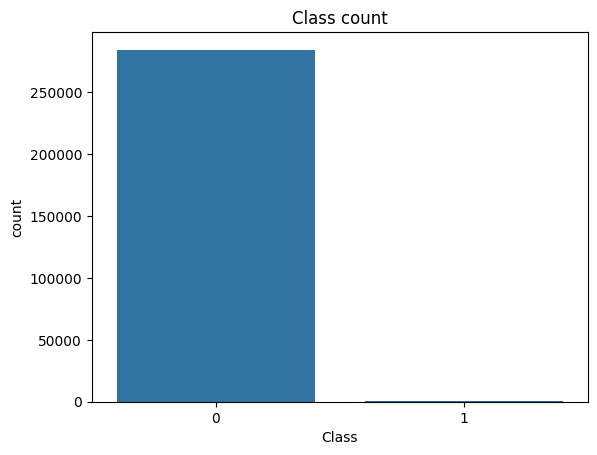

In [75]:
# Display the count plot for the label
_ = sns.countplot(y, x="Class").set(title="Class count")

# Print the counts
print(f"Fraudulent Transaction Count = {(y['Class'] == 1).sum()}")
print(f"Genuine Transaction Count = {(y['Class'] == 0).sum()}\n")

Wow, the class imbalance here is a big problem. Overwhelmingly large portion of our labels are 0 (Genuine transactions). Fraudulent transactions' count being this low is usually a good thing but to train a Classification Model as well as possible, I need a more balanced dataset. For now, let's visualise the features' distributions as well.

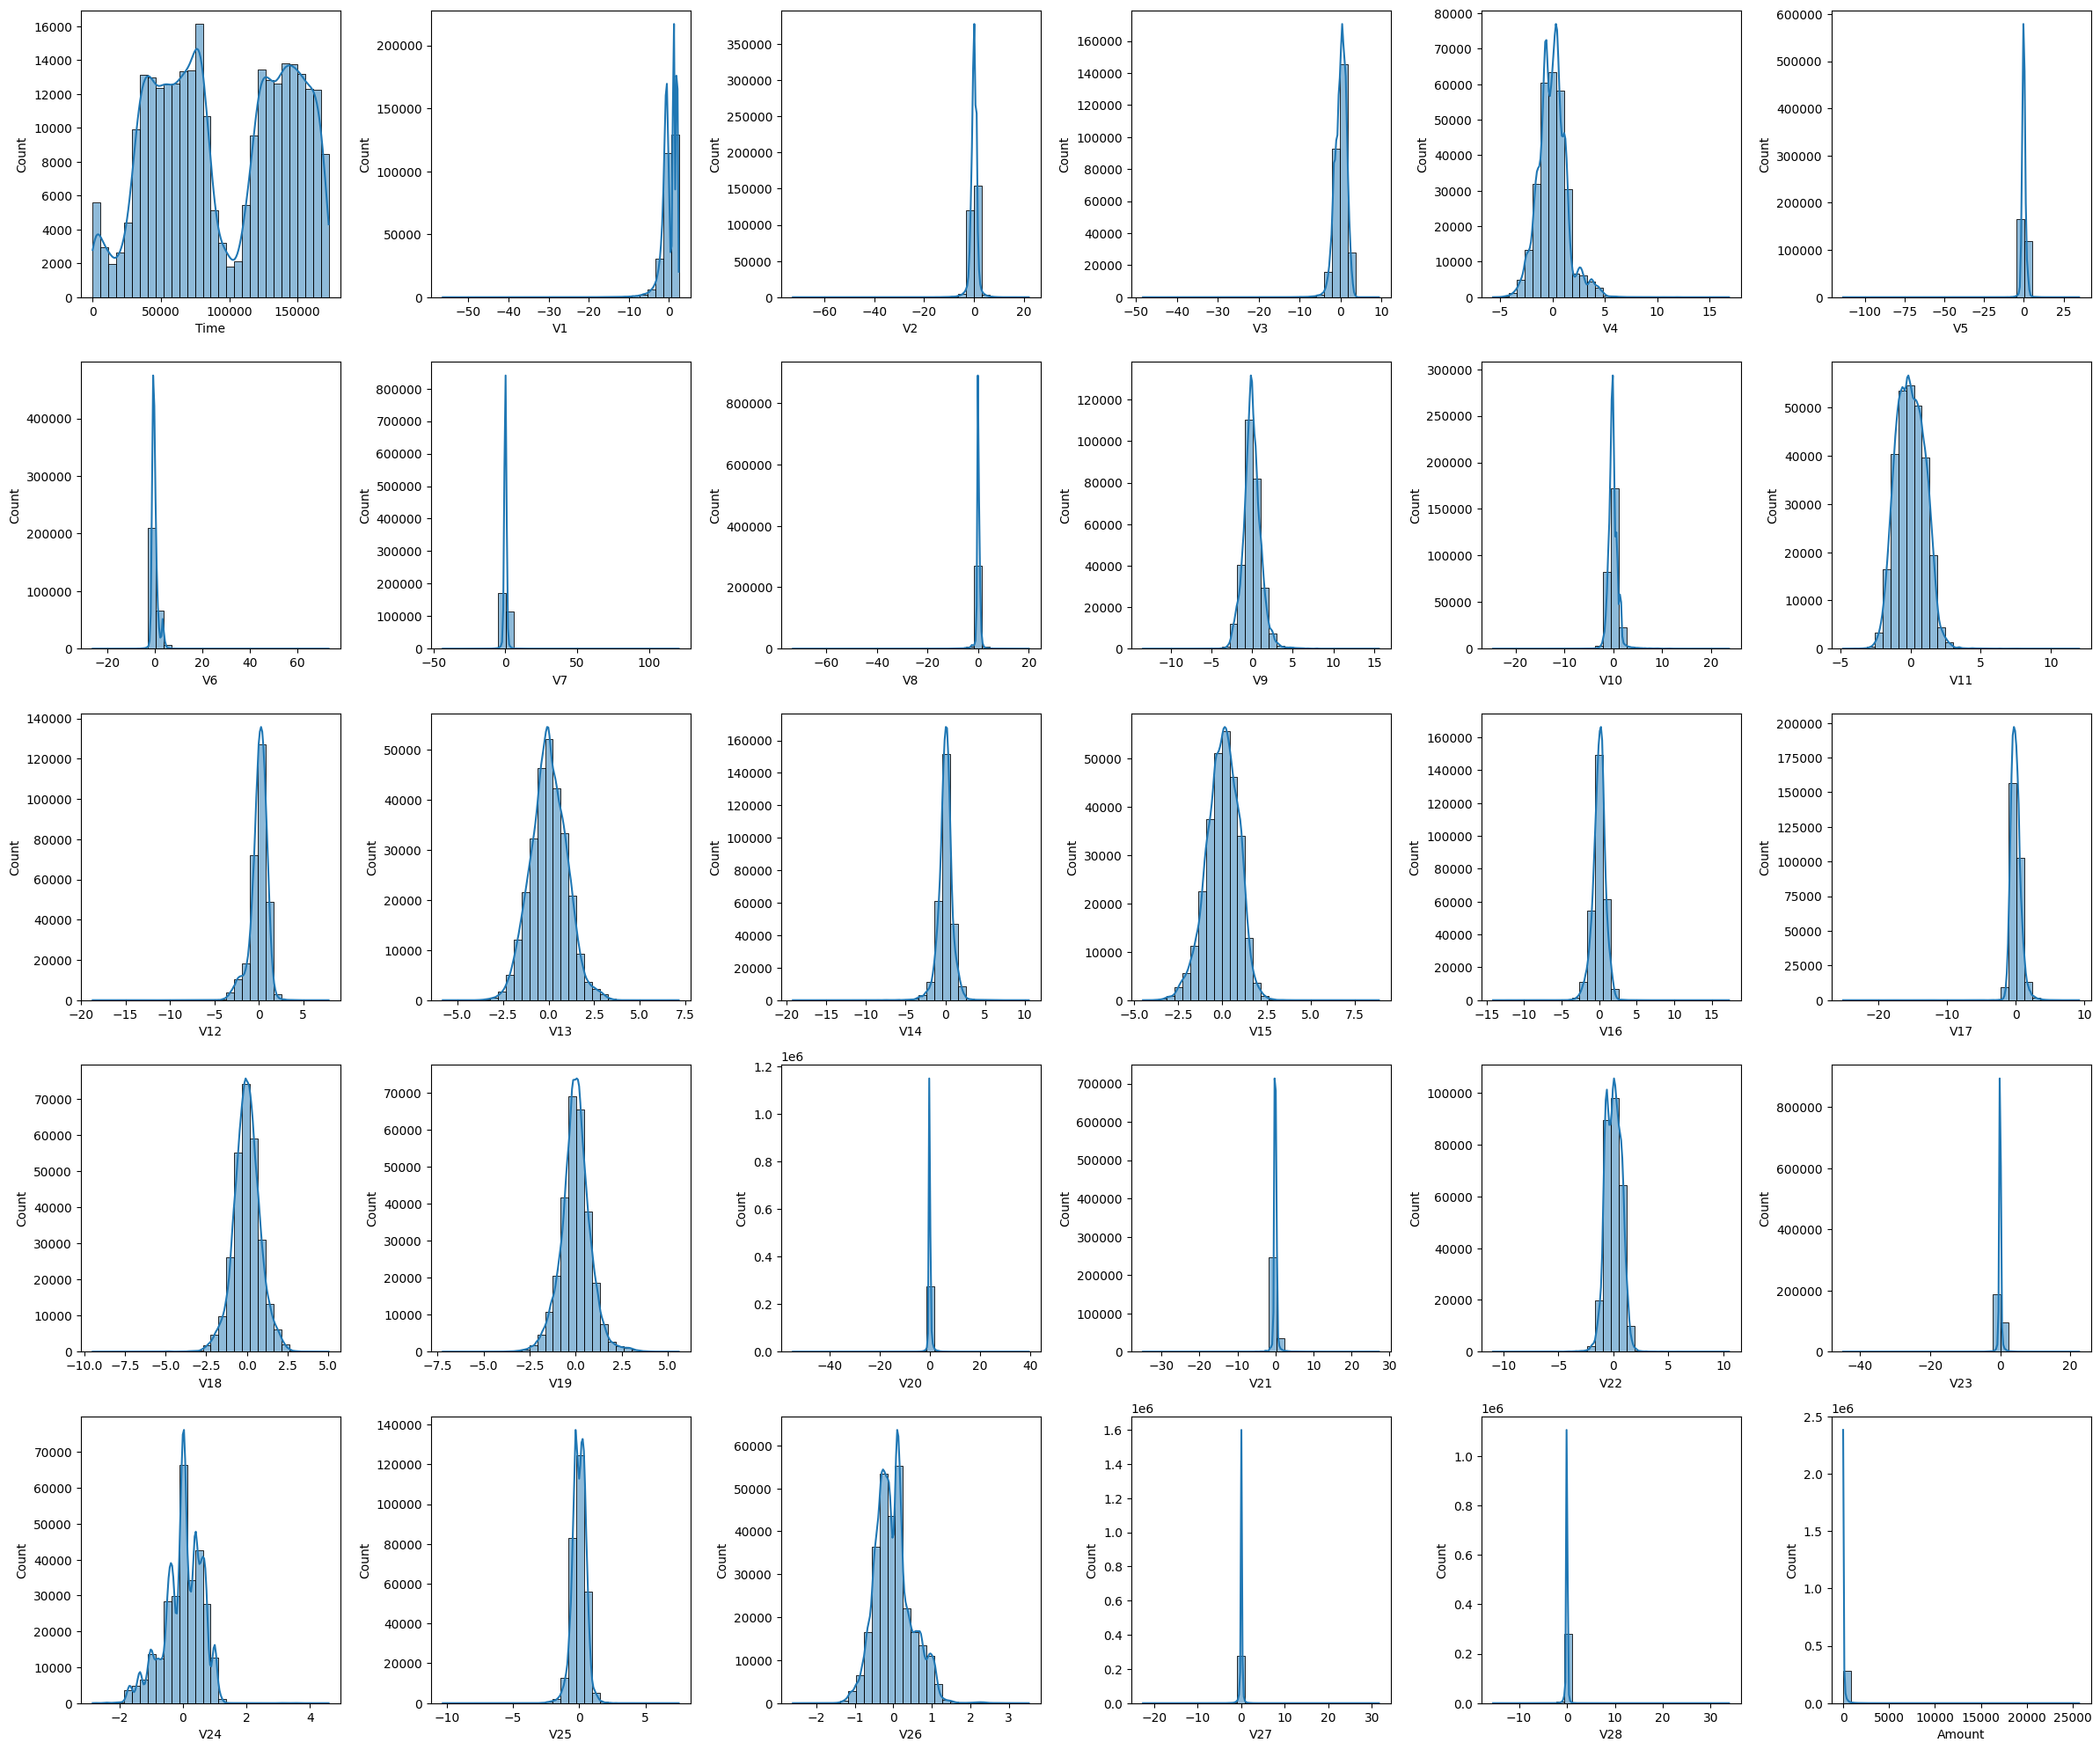

In [98]:
# Create a composite plot for all the features
fig, axs = plt.subplots(int(np.ceil(len(X_train.columns) / 6)), 6, figsize=(24, np.ceil(len(X_train.columns) * 4 / 6)))

# Flatten multi-dimensional into one-dimensional to easily iterate through
axs = axs.flatten()

# Iterate through the columns and plot their histograms
for i, col in enumerate(X_train.columns) :
  sns.histplot(data=X_train, x=col, ax=axs[i], bins=30, kde=True)

# Fix the overlap
fig.tight_layout()

Most of our features's plots look like a normal distribution which is also useful. Maybe they have been normalized before the upload.Though I will still have to normalize just a few of them or all of them as well to be consistent.